 # Visualization
 ## Import libraries and data

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from pulseNet import pulseNet
import numpy as np

file_path = 'input/data.csv'
dataset = pd.read_csv(file_path,index_col=0)


 ## Data summary

In [2]:
dataset.describe()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


 ## Data preprocessing

In [3]:
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]
# Y = (Y==1)
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state=0)

def plot_graph(x_data, y_data, title):
    plt.plot(x_data, y_data)
    plt.xlabel('time')
    plt.ylabel('EEG')
    plt.title(title)
    plt.show()

In [4]:
#minv = 0
#maxv = 0
#for i in range (len(X)):
    #listv = list(X.iloc[i])
    #min(listv)
    #minp = min(listv)
    #maxp = max(listv)
    #if minp < minv:
    #    minv = minp
    #if maxp > maxv:
    #    maxv = maxp
#minv
#maxv

 ### Bar plot of random row

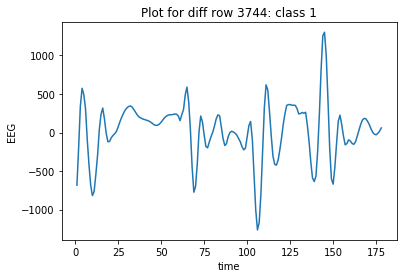

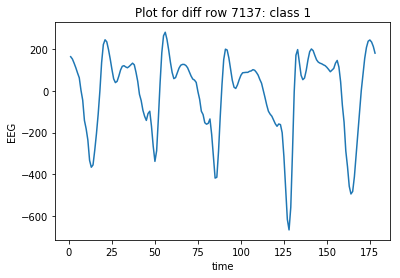

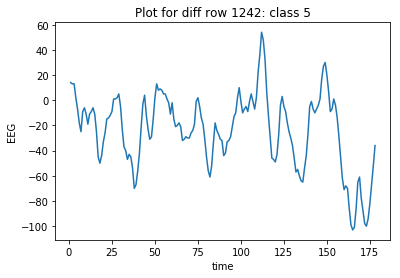

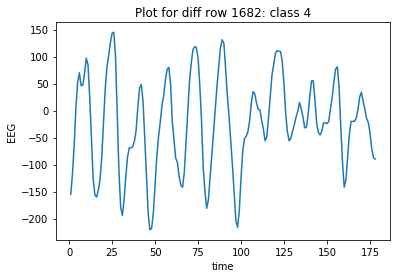

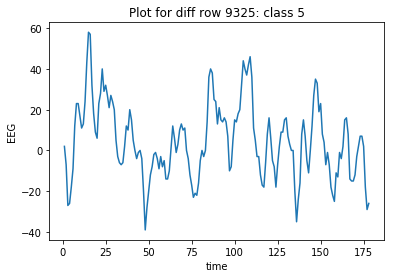

In [5]:
def plot_ranodm(count=1):
    if(count<1):
        return
    row = random.randint(0,len(X))
    Xd = list(X.iloc[row])
    # Xd = [x1-x2 for (x1,x2) in zip(Xd[1:],Xd[:-1])]
    # Xd = [(int)(x/10) for x in Xd]
    # plot_graph(list(range(1,179)), list(X.iloc[row]), 'Plot for row {}: class {}'.format(row, Y[row]))
    plot_graph(list(range(1,179)), Xd, 'Plot for diff row {}: class {}'.format(row, Y[row]))
    plot_ranodm(count-1)
# X.iloc[random.randint(0,len(X))].plot.bar()
plot_ranodm(5)

 ## Random Forest Classifier

In [ ]:
model = RandomForestRegressor(random_state=1)
model.fit(train_x, train_y)

 ### prediction and mean absolute error

In [ ]:
val_predict = model.predict(test_x)
print(mean_absolute_error(test_y, val_predict))
#appx. 0.7240695652173912 (regressor)
#appx. 0.6803478260869565 (classifier)

In [ ]:
def percentAccuracy(val_predict, test_y):
    correct = [v==y for (v,y) in zip(val_predict,test_y)]
    print(sum(correct)/len(test_y)*100)

In [ ]:
percentAccuracy(val_predict, test_y)

In [6]:
model = pulseNet(pos_lim=150, neg_lim=-150, pulse_len=5)

In [7]:
X = X.values
Y = Y.values
Y = (Y==1)

In [8]:
model.transform_pulse(X)

In [9]:
matrix = np.asarray(model.pulses_to_matrix(), dtype=np.ndarray)

In [10]:
train_x, test_x, train_y, test_y = train_test_split(matrix, Y, random_state=0)

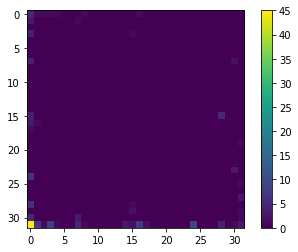

3005 True


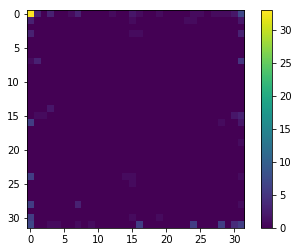

2184 True


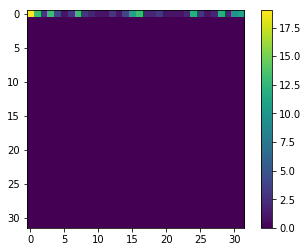

9453 False


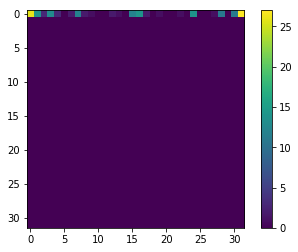

2801 True


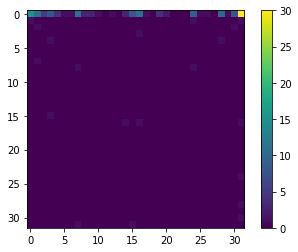

3973 False


In [11]:
model.plot_random_matrix(matrix, Y, count=5)

In [12]:
len(matrix[0]), Y

(32, array([False,  True, False, ..., False, False, False]))

In [13]:
model.export_jpgs(matrix, Y, out_dir='cat51')

Saving: 0
Saving: 500
Saving: 1000
Saving: 1500
Saving: 2000
Saving: 2500
Saving: 3000
Saving: 3500
Saving: 4000
Saving: 4500
Saving: 5000
Saving: 5500
Saving: 6000
Saving: 6500
Saving: 7000
Saving: 7500
Saving: 8000
Saving: 8500
Saving: 9000
Saving: 9500
Saving: 10000
Saving: 10500
Saving: 11000
